# Popular Data Science Questions

In [46]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# following
https://nbviewer.jupyter.org/urls/community.dataquest.io/uploads/short-url/6nhhfDlJWDmf7KXGjz9jhjwgldn.ipynb

SyntaxError: invalid syntax (<ipython-input-2-3676f70664ec>, line 2)

## Read Data

In [3]:
questions_df = pd.read_csv("2019_questions.csv", date_parser=['CreationDate'])
questions_df.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


## Clean Data

In [4]:
questions_df.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


In [5]:
questions_df.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [6]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [7]:
questions_df["FavoriteCount"].value_counts(dropna=False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
6.0        4
7.0        4
11.0       1
8.0        1
16.0       1
Name: FavoriteCount, dtype: int64

In [8]:
questions_df["Tags"].value_counts(dropna=False)

<machine-learning>                                                               118
<python><pandas>                                                                  58
<python>                                                                          55
<r>                                                                               38
<tensorflow>                                                                      36
                                                                                ... 
<neural-network><convolution><graphs>                                              1
<orange><scipy><orange3>                                                           1
<deep-learning><classification><normalization><deep-network>                       1
<deep-learning><dataset><image-classification><training><image-preprocessing>      1
<machine-learning><python><scikit-learn><tensorflow><pytorch>                      1
Name: Tags, Length: 6462, dtype: int64

From the previous info listed we conclude that **Tags** column should be converted to string and cleaned. **FavoriteCount** column is the unique that contains **NaN** values, in next steps will be filled with 0 value.

In [9]:
questions_df["FavoriteCount"] = questions_df["FavoriteCount"].fillna(0).astype(int)
questions_df["FavoriteCount"].value_counts(dropna=False)

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

In [10]:
questions_df["Tags"] = questions_df["Tags"].str.replace('><', ',').str.replace('<|>', "").str.split(',')
questions_df["Tags"].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

## Determining most popular tags

To determine the most popular tags we will consider the following:
<ul>
  <li>Find the count of how many times a tag was used.</li>
  <li>How many times a question with that tag was viewed.</li>  
</ul>

### Tags Count

In [11]:
tags_count = {}
for tags_list in questions_df["Tags"]:
    for tag in tags_list:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1
tags_count

{'machine-learning': 2693,
 'data-mining': 217,
 'regression': 347,
 'linear-regression': 175,
 'regularization': 50,
 'python': 1814,
 'time-series': 466,
 'forecast': 34,
 'forecasting': 85,
 'scikit-learn': 540,
 'pca': 85,
 'dataset': 340,
 'bigdata': 95,
 'data': 213,
 'speech-to-text': 8,
 'fuzzy-logic': 13,
 'anomaly-detection': 92,
 'online-learning': 13,
 'matrix-factorisation': 24,
 'correlation': 80,
 'naive-bayes-classifier': 42,
 'deep-learning': 1220,
 'keras': 935,
 'cnn': 489,
 'theory': 11,
 'gradient-descent': 98,
 'nlp': 493,
 'clustering': 257,
 'feature-extraction': 87,
 'encoding': 54,
 'embeddings': 44,
 'pandas': 354,
 'numpy': 117,
 'decision-trees': 145,
 'accuracy': 89,
 'matlab': 62,
 'reinforcement-learning': 203,
 'q-learning': 37,
 'policy-gradients': 27,
 'neural-network': 1055,
 'image-classification': 211,
 'r': 268,
 'logistic-regression': 154,
 'predictive-modeling': 265,
 'lstm': 402,
 'tensorflow': 584,
 'gpu': 42,
 'data-cleaning': 157,
 'object-d

In [12]:
questions_df

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,"[pca, dimensionality-reduction, linear-algebra]",1,1
8835,55414,2019-07-10 09:34:55,0,113,"[keras, weight-initialization]",0,0
8836,55415,2019-07-10 09:45:37,1,212,"[python, visualization, seaborn]",1,0
8837,55416,2019-07-10 09:59:56,0,22,[time-series],0,0


In [13]:
tags_views = {}
tags_score = {}
tags_answer_count = {}
tags_favorite_count = {}

for index, tags in enumerate(questions_df['Tags']):
    for tag in tags:
        if tag in tags_views:
            tags_views[tag] += questions_df["ViewCount"].iloc[index]
            tags_score[tag] += questions_df["Score"].iloc[index]
            tags_answer_count[tag] += questions_df["AnswerCount"].iloc[index]
            tags_favorite_count[tag] += questions_df["FavoriteCount"].iloc[index]
        else:
            tags_views[tag] = questions_df["ViewCount"].iloc[index]
            tags_score[tag] = questions_df["Score"].iloc[index]
            tags_answer_count[tag] = questions_df["AnswerCount"].iloc[index]
            tags_favorite_count[tag] = questions_df["FavoriteCount"].iloc[index]

tags_values_counts =  {} #tag-counts, tags-views, tag-score, tag-answe-count, tag-fav-count, tag-final-score
for tag in tags_count.keys():
    tags_values_counts[tag] = [tags_count[tag], 
                               tags_views[tag],
                               tags_score[tag],
                               tags_answer_count[tag],
                               tags_favorite_count[tag],                               
                               tags_count[tag] + tags_views[tag] + tags_score[tag] + tags_answer_count[tag] + tags_favorite_count[tag]
                              ]   

In [23]:
tags_counts_df = pd.DataFrame(columns=['tag', 'TagCount', 'TagViews', 'TagScore', 'TagAnswerCount', 'TagFavCount', 'TagTotalScore']) 
for tag in list(tags_values_counts.keys()):
    tags_counts_df = tags_counts_df.append({
        'tag': tag,
        'TagCount':tags_values_counts[tag][0], 
        'TagViews':tags_values_counts[tag][1], 
        'TagScore':tags_values_counts[tag][2], 
        'TagAnswerCount':tags_values_counts[tag][3], 
        'TagFavCount':tags_values_counts[tag][4], 
        'TagTotalScore':tags_values_counts[tag][5]         
    }, ignore_index=True)
tags_counts_df

,tag,TagCount,TagViews,TagScore,TagAnswerCount,TagFavCount,TagTotalScore
0,machine-learning,2693,388499,2515,2313,575,396595
1,data-mining,217,31056,186,183,31,31673
2,regression,347,49451,277,309,47,50431
3,linear-regression,175,18978,160,202,38,19553
4,regularization,50,4941,52,39,5,5087
...,...,...,...,...,...,...,...
521,encoder,1,16,1,1,0,19
522,label-smoothing,1,480,0,1,1,483
523,label-flipping,1,480,0,1,1,483
524,3d-object-detection,1,7,0,0,0,8


In [34]:
columns = ["TagCount", "TagViews", "TagScore", "TagAnswerCount", "TagFavCount", "TagTotalScore"]
tags_counts_df[columns] = tags_counts_df[columns].apply(pd.to_numeric)     

In [54]:
tags_counts_df.columns.tolist()

['tag',
 'TagCount',
 'TagViews',
 'TagScore',
 'TagAnswerCount',
 'TagFavCount',
 'TagTotalScore']

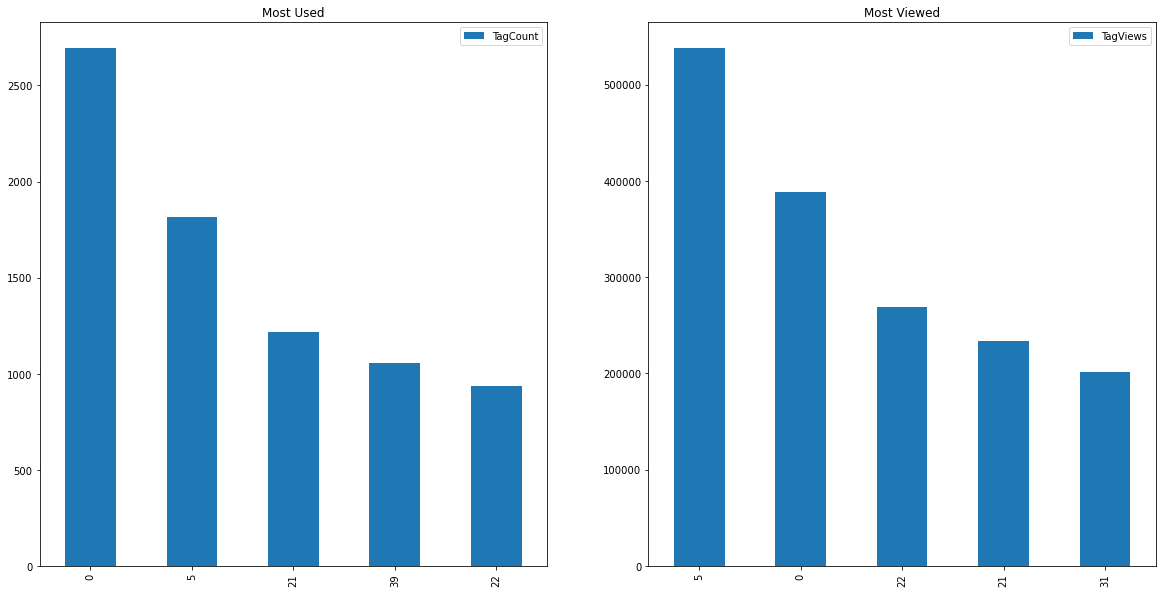

In [65]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,10))
tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(5).plot.bar(y='TagCount', ax=ax1, title="Most Used")
tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(5).plot.bar(y='TagViews', ax=ax2, title="Most Viewed")

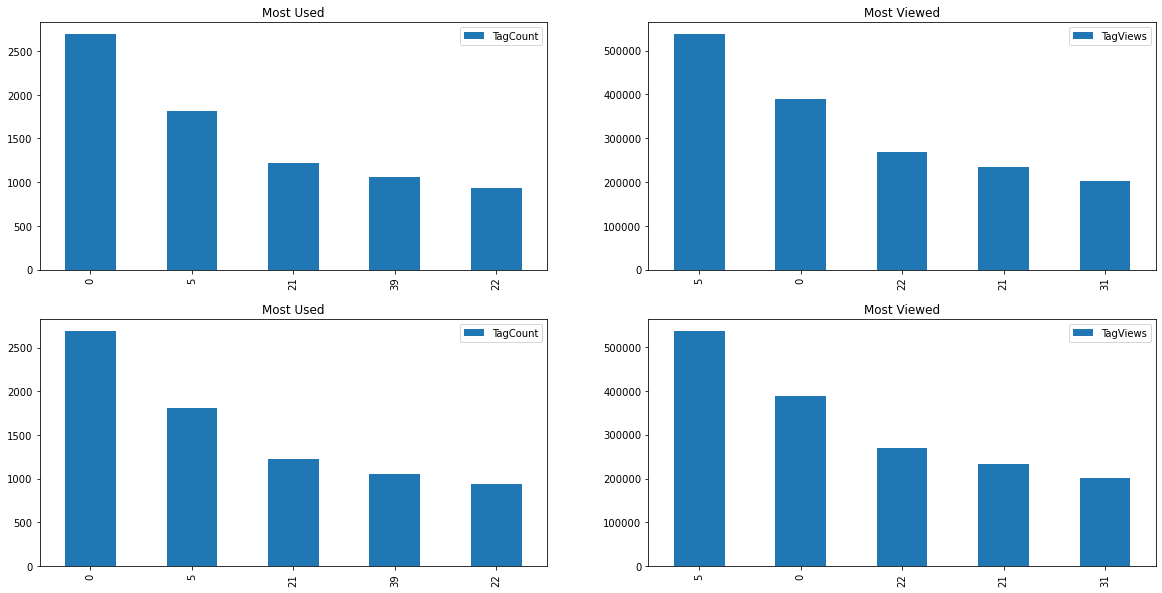

In [68]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(5).plot.bar(y='TagCount', ax=axes[0][0], title="Most Used")
tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(5).plot.bar(y='TagViews', ax=axes[0][1], title="Most Viewed")
tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(5).plot.bar(y='TagCount', ax=axes[1][0], title="Most Used")
tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(5).plot.bar(y='TagViews', ax=axes[1][1], title="Most Viewed")
#tags_counts_df[["tag", "TagScore"]].sort_values(by="TagScore", ascending=False).head(5).plot.bar(y='TagScore', ax=axes[2], title="Most Used")
#tags_counts_df[["tag", "TagAnswerCount"]].sort_values(by="TagAnswerCount", ascending=False).head(5).plot.bar(y='TagAnswerCount', ax=axes[3], title="Most Used")


In [ ]:
plt.figure(figsize=(20, 10))
ax = star_wars[star_wars.columns[3:9]].astype(float).sum(axis=0).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
ax.set_title("Most Watched Star Wars Movie", fontweight="bold", fontsize=15,)
ax.set_xlabel("Movie Number",fontsize=12)
ax.set_ylabel("Total Views",fontsize=12)
ax.tick_params(bottom=True, top=False, left=False, right=False, labelbottom=True)